In [1]:
#import libraries
%matplotlib inline                   

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
corr_list = []          #downloads drive distance and scoring data for each year from 1980 to 2017 and computes Pearson correlation
for year in range(1980,2018):
    str_year = str(year)
    url_dd = "https://www.pgatour.com/stats/stat.101."+str_year+".html"
    html_dd = urlopen(url_dd)
    soup_dd = BeautifulSoup(html_dd)
    column_headers_dd = [th.getText() for th in 
                  soup_dd.findAll('tr', limit=2)[1].findAll('th')]
    data_rows_dd = soup_dd.findAll('tr')[2:] 
    player_data_dd = [[td.getText() for td in data_rows_dd[i].findAll('td')]
            for i in range(len(data_rows_dd))]
    df_dd = pd.DataFrame(player_data_dd, columns=column_headers_dd)
    df_dd.rename(columns={'AVG.':'AVG DRIVE DIST'},inplace=True)
    df_dd = df_dd.drop(['RANK THIS WEEK','RANK LAST WEEK','TOTAL DISTANCE', 'TOTAL DRIVES'],axis=1)
    dd_dict = df_dd.set_index('PLAYER NAME').T.to_dict()  
    url_score = "https://www.pgatour.com/stats/stat.120."+str_year+".html"
    html_score = urlopen(url_score)
    soup_score = BeautifulSoup(html_score)
    column_headers_score = [th.getText() for th in 
                  soup_score.findAll('tr', limit=2)[1].findAll('th')]
    data_rows_score = soup_score.findAll('tr')[2:] 
    player_data_score = [[td.getText() for td in data_rows_score[i].findAll('td')]
            for i in range(len(data_rows_score))]
    df_score = pd.DataFrame(player_data_score, columns=column_headers_score) 
    df_score.rename(columns={'AVG':'AVG SCORE'},inplace=True)
    df_score = df_score.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','TOTAL STROKES', 'TOTAL ADJUSTMENT', 'TOTAL ROUNDS'],axis=1)
    #if len(df_dd) != len(df_score):
    #    print(year, len(df_dd), len(df_score))
    score_dict = df_score.set_index('PLAYER NAME').T.to_dict()
    for key in score_dict:                                           
        score_dict[key].update(dd_dict[key])
    total_dict = score_dict
    df_total = pd.DataFrame(total_dict).T
    dd_arr = np.array(df_total['AVG DRIVE DIST']).astype(float)
    score_arr = np.array(df_total['AVG SCORE']).astype(float)
    corr_list.append(np.corrcoef(dd_arr,score_arr)[1][0])
    #print(corr_list)




C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Chris\Anaconda3\lib\site-packages\pandas\core\frame.py:891: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


In [3]:
corr_arr = np.array(corr_list)
years_arr = np.arange(1980,2018)

In [2]:
averages = []
deviations = []
for year in range(1980,2018):
    str_year = str(year)
    url_dd_1 = "https://www.pgatour.com/stats/stat.101."+str_year+".html"
    html_dd_1 = urlopen(url_dd_1)
    soup_dd_1 = BeautifulSoup(html_dd_1)
    column_headers_dd_1 = [th.getText() for th in 
                  soup_dd_1.findAll('tr', limit=2)[1].findAll('th')]
    data_rows_dd_1 = soup_dd_1.findAll('tr')[2:] 
    player_data_dd_1 = [[td.getText() for td in data_rows_dd_1[i].findAll('td')]
            for i in range(len(data_rows_dd_1))]
    df_dd_1 = pd.DataFrame(player_data_dd_1, columns=column_headers_dd_1)
    df_dd_1.rename(columns={'AVG.':'AVG DRIVE DIST'},inplace=True)
    df_dd_1 = df_dd_1.drop(['RANK THIS WEEK','RANK LAST WEEK','TOTAL DISTANCE', 'TOTAL DRIVES'],axis=1)
    dd_arr_1 = np.array(df_dd_1['AVG DRIVE DIST']).astype(float)
    averages.append(np.mean(dd_arr_1))
    deviations.append(np.std(dd_arr_1))

C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [3]:
avg_dd_arr = np.array(averages)
avg_dd_arr

array([ 256.78228571,  259.44876543,  256.7689441 ,  258.49655172,
        259.47967033,  259.94134078,  261.53258427,  262.21329787,
        263.36324324,  261.73172043,  262.72395833,  261.36137566,
        260.39726776,  260.16243386,  261.88826816,  263.43138298,
        266.36421053,  267.60615385,  270.53776596,  272.46041667,
        273.17076923,  279.38659794,  279.7509901 ,  286.56894737,
        287.175     ,  288.57376238,  289.49846939,  289.07908163,
        287.6106599 ,  287.95869565,  287.51354167,  291.08978495,
        290.0539267 ,  287.92166667,  290.01694915,  290.30108696,
        290.89891892,  292.78210526])

In [4]:
std_dd_arr = np.array(deviations)
std_dd_arr

array([ 7.41131763,  7.19522508,  7.23067341,  7.01767798,  7.02898035,
        7.15452511,  8.10276379,  7.24137666,  7.13954728,  7.57936604,
        6.68284877,  7.65547425,  7.45444769,  7.94824638,  8.34225475,
        7.99152638,  7.98810847,  8.0163911 ,  7.70066378,  7.84113724,
        7.51412461,  7.32677098,  7.52769961,  8.63697888,  8.25335043,
        9.29497654,  8.70820911,  8.54174152,  8.53271626,  8.57538378,
        8.19507753,  8.32056999,  8.36117134,  7.9888483 ,  8.67147058,
        9.12245193,  8.62676532,  9.40795273])

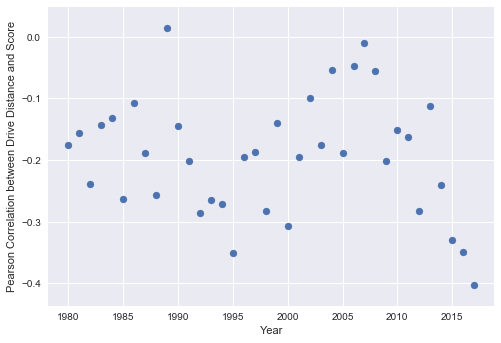

In [8]:
plt.scatter(years_arr, corr_arr) 
plt.xlabel('Year')
plt.ylabel('Pearson Correlation between Drive Distance and Score')
plt.show()  

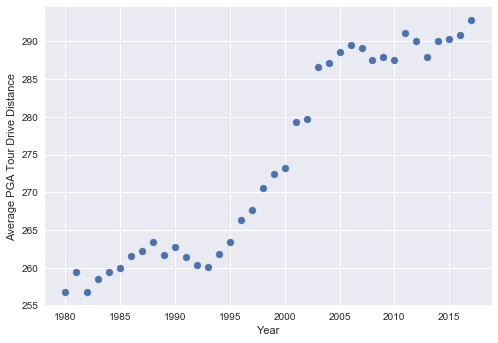

In [12]:
plt.scatter(years_arr, avg_dd_arr)                     #How the average drive distance for PGA TOUR players has changed over time
plt.xlabel('Year')
plt.ylabel('Average PGA Tour Drive Distance')
plt.show()

In [14]:
corr_list_2 = []        #downloads GIR and scoring data for each year from 1980 to 2017 and computes Pearson correlation
for year in range(1980,2018):
    str_year = str(year)
    url_gir = "https://www.pgatour.com/stats/stat.103."+str_year+".html"
    html_gir = urlopen(url_gir)
    soup_gir = BeautifulSoup(html_gir)
    column_headers_gir = [th.getText() for th in 
                  soup_gir.findAll('tr', limit=2)[1].findAll('th')]
    data_rows_gir = soup_gir.findAll('tr')[2:] 
    player_data_gir = [[td.getText() for td in data_rows_gir[i].findAll('td')]
            for i in range(len(data_rows_gir))]
    df_gir = pd.DataFrame(player_data_gir, columns=column_headers_gir)
    df_gir.rename(columns={'%':'PERCENT GIR'},inplace=True)
    df_gir = df_gir.drop(['RANK THIS WEEK','RANK LAST WEEK','GREENS HIT', "# HOLES", 'RELATIVE/PAR'],axis=1)
    gir_dict = df_gir.set_index('PLAYER NAME').T.to_dict()  
    url_score = "https://www.pgatour.com/stats/stat.120."+str_year+".html"
    html_score = urlopen(url_score)
    soup_score = BeautifulSoup(html_score)
    column_headers_score = [th.getText() for th in 
                  soup_score.findAll('tr', limit=2)[1].findAll('th')]
    data_rows_score = soup_score.findAll('tr')[2:] 
    player_data_score = [[td.getText() for td in data_rows_score[i].findAll('td')]
            for i in range(len(data_rows_score))]
    df_score = pd.DataFrame(player_data_score, columns=column_headers_score) 
    df_score.rename(columns={'AVG':'AVG SCORE'},inplace=True)
    df_score = df_score.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','TOTAL STROKES', 'TOTAL ADJUSTMENT', 'TOTAL ROUNDS'],axis=1)
    #if len(df_dd) != len(df_score):
    #    print(year, len(df_dd), len(df_score))
    score_dict = df_score.set_index('PLAYER NAME').T.to_dict()
    for key in score_dict:                                           
        score_dict[key].update(gir_dict[key])
    total_dict = score_dict
    df_total = pd.DataFrame(total_dict).T
    dd_arr = np.array(df_total['PERCENT GIR']).astype(float)
    score_arr = np.array(df_total['AVG SCORE']).astype(float)
    corr_list_2.append(np.corrcoef(dd_arr,score_arr)[1][0])
    

C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Chris\Anaconda3\lib\site-packages\pandas\core\frame.py:891: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


In [15]:
corr_2_arr = np.array(corr_list_2)


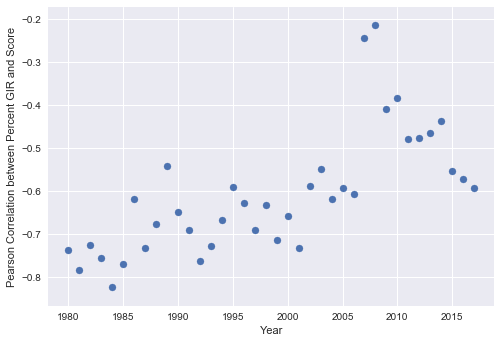

In [16]:
plt.scatter(years_arr, corr_2_arr)                  
plt.xlabel('Year')
plt.ylabel('Pearson Correlation between Percent GIR and Score')
plt.show()  

In [23]:
np.corrcoef(avg_dd_arr,corr_2_arr)[1][0]      #correlation between avg drive distance and Pearson of GIR and score

0.72541522037379458

In [18]:
corr_list_3 = []       #downloads drive accuracy and scoring data for each year from 1980 to 2017 and computes Pearson correlation
for year in range(1980,2018):
    str_year = str(year)
    url_da = "https://www.pgatour.com/stats/stat.102."+str_year+".html"
    html_da = urlopen(url_da)
    soup_da = BeautifulSoup(html_da)
    column_headers_da = [th.getText() for th in 
                  soup_da.findAll('tr', limit=2)[1].findAll('th')]
    data_rows_da = soup_da.findAll('tr')[2:] 
    player_data_da = [[td.getText() for td in data_rows_da[i].findAll('td')]
            for i in range(len(data_rows_da))]
    df_da = pd.DataFrame(player_data_da, columns=column_headers_da)
    df_da.rename(columns={'%':'PERCENT FAIRWAYS'},inplace=True)
    df_da = df_da.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','FAIRWAYS HIT', 'POSSIBLE FAIRWAYS'],axis=1)
    da_dict = df_da.set_index('PLAYER NAME').T.to_dict()  
    url_score = "https://www.pgatour.com/stats/stat.120."+str_year+".html"
    html_score = urlopen(url_score)
    soup_score = BeautifulSoup(html_score)
    column_headers_score = [th.getText() for th in 
                  soup_score.findAll('tr', limit=2)[1].findAll('th')]
    data_rows_score = soup_score.findAll('tr')[2:] 
    player_data_score = [[td.getText() for td in data_rows_score[i].findAll('td')]
            for i in range(len(data_rows_score))]
    df_score = pd.DataFrame(player_data_score, columns=column_headers_score) 
    df_score.rename(columns={'AVG':'AVG SCORE'},inplace=True)
    df_score = df_score.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','TOTAL STROKES', 'TOTAL ADJUSTMENT', 'TOTAL ROUNDS'],axis=1)
    #if len(df_dd) != len(df_score):
    #    print(year, len(df_dd), len(df_score))
    score_dict = df_score.set_index('PLAYER NAME').T.to_dict()
    for key in score_dict:                                           
        score_dict[key].update(da_dict[key])
    total_dict = score_dict
    df_total = pd.DataFrame(total_dict).T
    da_arr = np.array(df_total['PERCENT FAIRWAYS']).astype(float)
    score_arr = np.array(df_total['AVG SCORE']).astype(float)
    corr_list_3.append(np.corrcoef(da_arr,score_arr)[1][0])

C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
C:\Users\Chris\Anaconda3\lib\site-packages\pandas\core\frame.py:891: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


In [19]:
corr_3_arr = np.array(corr_list_3)

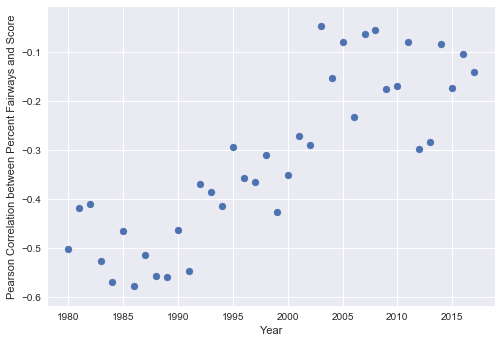

In [20]:
plt.scatter(years_arr, corr_3_arr)                  
plt.xlabel('Year')
plt.ylabel('Pearson Correlation between Percent Fairways and Score')
plt.show()  

In [22]:
np.corrcoef(avg_dd_arr,corr_3_arr)[1][0]  #correlation between avg drive distance and Pearson of drive distance and score

0.88611201430722131